<a href="https://colab.research.google.com/github/afrojaakter/Neural-Computing/blob/main/StochasticLinearRecurrentNewtork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

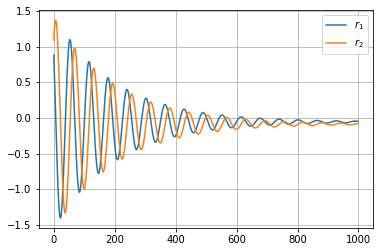

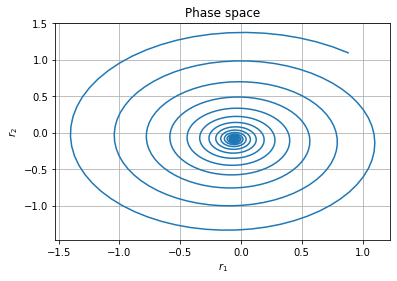

In [1]:
import numpy as np
from scipy.stats import matrix_normal
import matplotlib.pyplot as plt


sigma = 1
a = 0.1
I_2 = np.eye(2)
I = np.ones((2,1))
cov = (sigma**2)*I
h_t = np.random.normal(0, cov)
W = np.array([[0, -a], [a, 0]])

dt = 0.01
T = 10
N = int(T/dt)
r_0 = np.array([[1,1]]).T

r1 = np.array(())
r2 = np.array(())

for t in range(N):
  B = (1 - dt) * I_2 + W
  r_t = np.dot(B,r_0) + dt * h_t
  r_0 = r_t

  r1 = np.append(r1, [r_t[0]])
  r2= np.append(r2, [r_t[1]])

plt.figure()
plt.plot(r1, label = '$r_1$')
plt.plot(r2, label = '$r_2$')
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(r1, r2)
plt.xlabel('$r_1$')
plt.ylabel('$r_2$')
plt.title("Phase space")
plt.grid()
plt.show()

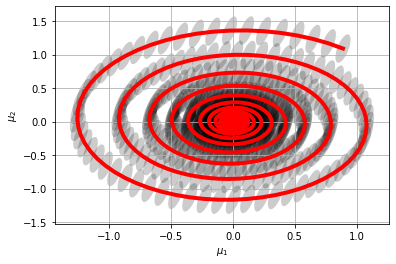

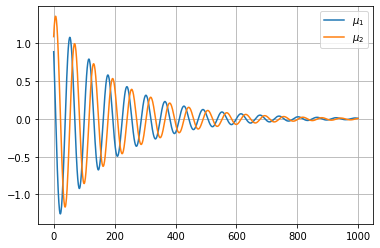

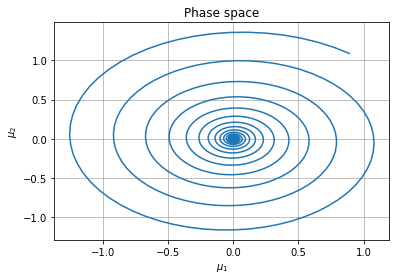

In [11]:
import numpy as np
from scipy.stats import matrix_normal
import matplotlib.pyplot as plt
from numpy import linalg as LA

def plotCovarianceEllipse(mu, Sigma):
  D , V= LA.eig(Sigma)
  theta_grad = np.linspace(0, 2*np.pi, 40)
  a = np.sqrt(D[1]/K)
  b = np.sqrt(D[0]/K)
  ellipse_x = a * np.cos(theta_grad)
  ellipse_y = b * np.sin(theta_grad)
  phi = np.arctan2(V[1,1], V[1, 0])
  R = np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])
  ellipse = np.array([ellipse_x, ellipse_y]).T @ R
  plt.fill_between(ellipse[:,0] + mu[0], ellipse[:,1] + mu[1],
                 facecolor="black", # The fill color                
                 alpha=0.2)          # Transparency of the fill


sigma = 1
a = 0.1
I_2 = np.eye(2)
I = np.ones((2,1))
cov = (sigma**2)*I

W = np.array([[0, -a], [a, 0]])

dt = 0.01
T = 10
N = int(T/dt)


Sigma = np.empty(())
r_ts = np.array(())

r1_avg = np.zeros(())
r2_avg = np.zeros(())
K = 1000

for i in range(K):
  r_0 = np.array([[1,1]]).T
  h_t = np.random.normal(0, cov)
  r1 = np.array(())
  r2 = np.array(())
  for t in range(N):
    B = (1 - dt) * I_2 + W
    r_t = np.dot(B,r_0) + dt * h_t
    r_0 = r_t
    r1 = np.append(r1, [r_t[0]])
    r2= np.append(r2, [r_t[1]])
  
  r1_avg =  r1_avg + r1
  r2_avg = r2_avg + r2

  
r1_avg = r1_avg/K
r2_avg = r2_avg/K
r = np.array((r1, r2))

mu_t = np.array((r1_avg, r2_avg))
Sigma_t = (r - mu_t) @ (r - mu_t).T

for i in range(K):
  plotCovarianceEllipse(mu_t[:,i], Sigma_t)
plt.plot(r1_avg, r2_avg, 'r-', linewidth=4.0, label = '$\mu_t$')
plt.xlabel('$\mu_1$')
plt.ylabel('$\mu_2$')
plt.grid()
plt.show()


plt.figure()
plt.plot(r1_avg, label = '$\mu_1$')
plt.plot(r2_avg, label = '$\mu_2$')
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(r1_avg, r2_avg)
plt.xlabel('$\mu_1$')
plt.ylabel('$\mu_2$')
plt.title("Phase space")
plt.grid()
plt.show()